In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

Loaded 30 alphabets
  Gujarati: 960 images
  Korean: 800 images
  Arcadian: 520 images
  Malay_(Jawi_-_Arabic): 800 images
  Grantha: 860 images
  Blackfoot_(Canadian_Aboriginal_Syllabics): 280 images
  Balinese: 480 images
  Futurama: 520 images
  N_Ko: 660 images
  Burmese_(Myanmar): 680 images
  Anglo-Saxon_Futhorc: 580 images
  Mkhedruli_(Georgian): 820 images
  Latin: 520 images
  Braille: 520 images
  Sanskrit: 840 images
  Japanese_(hiragana): 1040 images
  Tagalog: 340 images
  Greek: 480 images
  Ojibwe_(Canadian_Aboriginal_Syllabics): 280 images
  Japanese_(katakana): 940 images
  Early_Aramaic: 440 images
  Hebrew: 440 images
  Tifinagh: 1100 images
  Asomtavruli_(Georgian): 800 images
  Armenian: 820 images
  Syriac_(Estrangelo): 460 images
  Alphabet_of_the_Magi: 400 images
  Cyrillic: 660 images
  Bengali: 920 images
  Inuktitut_(Canadian_Aboriginal_Syllabics): 320 images
Starting quick training test...
Epoch 1/2
 Step 0/10 - loss: 7.9355
Debug - Checking if model weights

/Users/gboa/build_space/alph/alphaba/src/training.py:135: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(reduced_embeddings_2d[mask, 0],


TypeError: Legend.__init__() got an unexpected keyword argument 'box_to_anchor'. Did you mean 'bbox_to_anchor'?

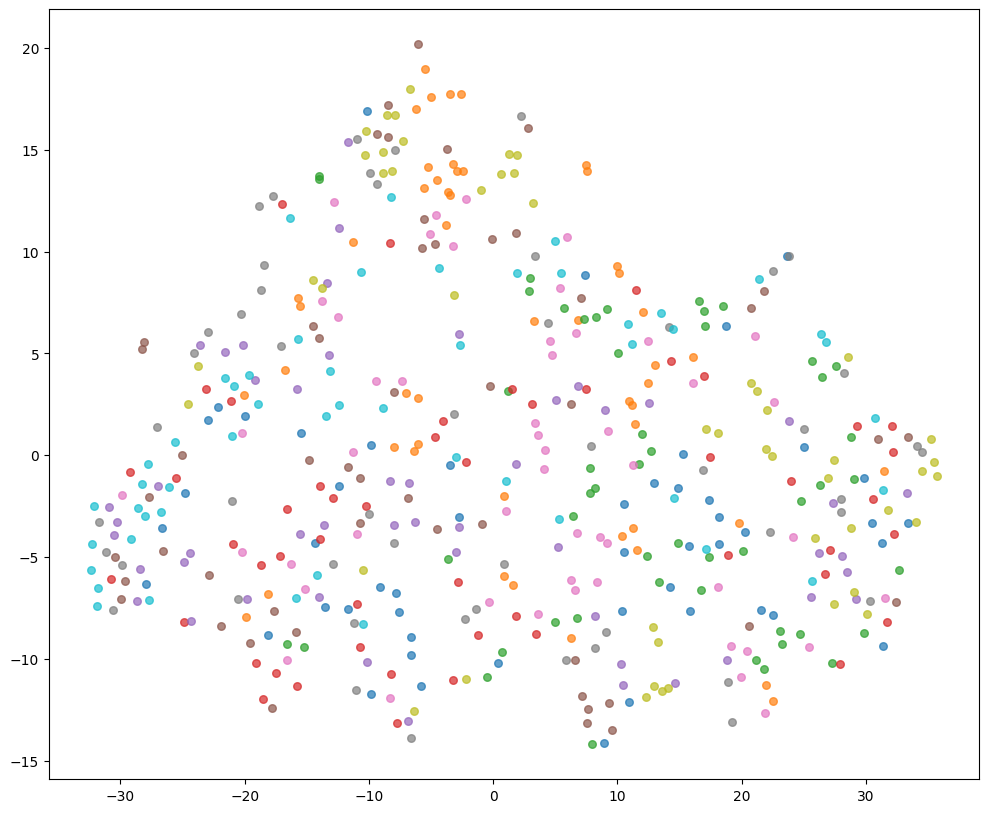

In [2]:
import sys
sys.path.append('..')
from src.data_loader import OmniglotTripletLoader
from src.models import create_triplet_model
from src.training import train_triplet_model_custom, evaluate_embeddings

# Quick setup
loader = OmniglotTripletLoader("../../omniglot/python")
triplet_model, base_network = create_triplet_model(embedding_dim=128)

print("Starting quick training test...")
history = train_triplet_model_custom(
    triplet_model, loader,
    epochs=2,           # Very short test
    batch_size=8,       # Small batches
    steps_per_epoch=10  # Quick epochs
)

print(f"Final loss values: {history['loss']}")
print(f"Loss decreased: {history['loss'][0] > history['loss'][-1]}")

# Quick evaluation
print("Generating evaluation plot...")
embeddings, labels = evaluate_embeddings(triplet_model, loader, num_samples=100)
print("Training test complete!")